In [1]:
# Simple Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import dataset

dataset =pd.read_csv('auto_insurance_payment.csv')
#dataset = pd.read_csv('auto_insurance_payment.csv')

In [3]:
dataset.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


In [4]:
dataset.tail()

,Number of claims,Total Payment
58,9,874
59,31,2098
60,14,955
61,53,2446
62,26,1875


In [5]:
dataset.isna().sum()

Number of claims    0
 Total Payment      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35a1114748>,
      dtype=object)

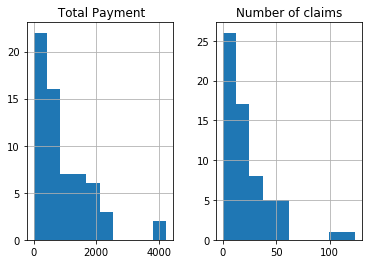

In [6]:
dataset.hist()

In [7]:
dataset.isna().sum()

Number of claims    0
 Total Payment      0
dtype: int64

In [8]:
dataset.describe()

,Number of claims,Total Payment
count,63.000000,63.000000
mean,22.904762,921.873016
std,23.351946,878.266281
min,0.000000,0.000000
25%,7.500000,299.000000
50%,14.000000,596.000000
75%,29.000000,1364.000000
max,124.000000,4222.000000


In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


In [10]:
X.shape

(63, 1)

In [11]:
y.shape

(63,)

In [12]:
y

array([3925,  462,  157, 4222, 1194, 1709,  569,  775,  214,  653,  209,
       2481,  235,  396,  488,   66, 1349,  509,   44,  113,  148,  487,
        521,  132, 1039,  775,  118,  981,  279,  381,    0,  692,  146,
        403, 1615,  572, 2176,  581,  126,  596,  899, 2024, 1813, 1528,
       1628,  734,  213,  926,  761,  399, 1421,   93,  319,  321,  556,
       1333, 1945, 1379,  874, 2098,  955, 2446, 1875])

In [13]:
dataset.corr()

,Number of claims,Total Payment
Number of claims,1.000000,0.880668
Total Payment,0.880668,1.000000


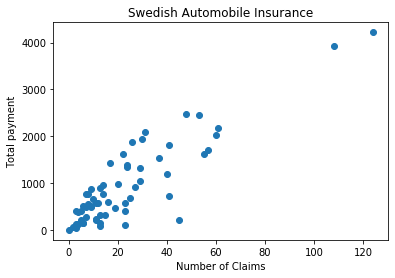

In [14]:
# Visualise dataset
plt.scatter(X, y)
plt.title('Swedish Automobile Insurance')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()


In [15]:
# Split dataset into Training and Test set
# sklearn.cross_validation  - Deprecated

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [16]:
# Feature Scaling
# Alternative: ColumnTransformer
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1, 1))
X_test = sc_X.fit_transform(X_test)
y_test_org = y_test
y_test = sc_y.fit_transform(np.array(y_test).reshape(-1, 1))


In [20]:
dataset.describe()

,Number of claims,Total Payment
count,63.000000,63.000000
mean,22.904762,921.873016
std,23.351946,878.266281
min,0.000000,0.000000
25%,7.500000,299.000000
50%,14.000000,596.000000
75%,29.000000,1364.000000
max,124.000000,4222.000000


In [17]:
# Simple Linear Regression with Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Predict Test set
y_pred = regressor.predict(X_test)

In [19]:
# Print unscaled test and predicted values
y_pred_inv = sc_y.inverse_transform(y_pred)
print(pd.DataFrame(np.column_stack((y_test_org, y_pred_inv))))

         0            1
0   1528.0  1745.143005
1    399.0   111.462971
2   1875.0  1216.599464
3     93.0   591.957099
4    146.0   255.611209
5   1615.0  1024.401813
6    381.0   159.512384
7    213.0   495.858273
8   2481.0  2273.686545
9    157.0   591.957099
10   118.0   159.512384
11   955.0   640.006511
12  1194.0  1889.291243


In [20]:
# Print Coefficient & Intercept
print('Coefficient: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)


Coefficient:  [[0.89362103]]
Intercept:  [-3.17477965e-17]


In [21]:
# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, accuracy_score
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % explained_variance_score(y_test, y_pred))
# Coefficient of determination
print('R^2 Square value', r2_score(y_test, y_pred))


Mean absolute error: 0.45
Mean squared error: 0.27
Root Mean squared error: 0.52
Variance score: 0.73
R^2 Square value 0.7283041528587626


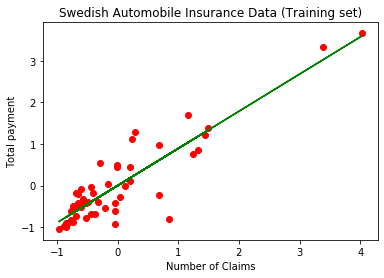

In [22]:
# Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Swedish Automobile Insurance Data (Training set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()


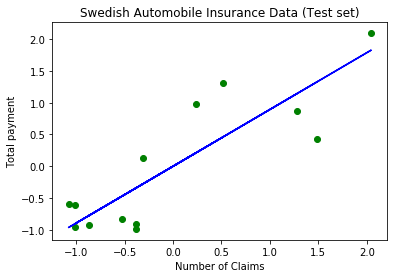

In [23]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Swedish Automobile Insurance Data (Test set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()


In [24]:
lr_pred =regressor.predict(np.array([[108]]))

In [25]:
lr_pred

array([[96.51107096]])

In [26]:
dataset

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194
5,57,1709
6,23,569
7,14,775
8,45,214
9,10,653


1.Data exporation
2.Assign X,Y with the feature names since y=mc+c is regression eqation
3.split data for training & testing using train_test_split method in sklearn or use slice operator to split it
4.import the regression algo from sklearn
5.use fit method to train the model via algorithm
6.Test the dataset to validate the model using predict method
7.calculate the error report such as MSE,RMSE,Rsquare
8.plot the graph to show the result via matplotlib

In [27]:
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Split dataset into Training and Test set
# sklearn.cross_validation  - Deprecated

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [31]:
X_train.shape

(50, 1)

In [35]:
dataset.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


In [72]:
a=dataset['Number of claims']

In [73]:
b=dataset.iloc[:,1:].values

In [74]:
b.shape

(63, 1)

In [77]:
# Split dataset into Training and Test set
# sklearn.cross_validation  - Deprecated

from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2)


In [79]:
a_train.head()

30      0
55     29
48      8
0     108
24     29
Name: Number of claims, dtype: int64